# Introduction

Data analysis and price prediction are essential in the real estate industry, particularly for housing markets. These practices enable stakeholders to gain insights into the factors influencing housing prices, make informed decisions, and maximize opportunities. Data analysis helps uncover trends and patterns in historical transaction data, while price prediction utilizes statistical and machine learning techniques to forecast future prices. 

Accurate price predictions benefit buyers, sellers, and investors by aiding decision-making, optimizing returns, and minimizing risks. Policymakers can also leverage data analysis and price prediction to inform housing policies and promote sustainable growth. Overall, these practices empower stakeholders with data-driven insights, leading to better outcomes in the dynamic housing market.

# Introduction to Data

The Beijing housing prices dataset provides a comprehensive collection of data on housing transactions in the Beijing area from 2013 to 2017. This dataset, sourced from the popular estate trading platform lianjia.com, offers valuable insights into various attributes and factors influencing the housing market. With 26 attributes and a dataset size of 318,851 entries, this dataset presents a rich resource for exploring and analyzing the dynamics of Beijing's real estate market.

The dataset includes a range of variables that capture essential information about each housing transaction. These variables cover aspects such as location, property features, pricing, transaction dates, and other relevant attributes. Understanding these variables and their relationships can shed light on the key factors influencing housing prices in Beijing.

Some of the significant variables in the dataset include:

- URL: The URL from which the data was fetched, providing a reference to the source of information.
- ID: The unique identification number assigned to each housing transaction, enabling easy tracking and referencing.
- Lng and Lat Coordinates: The longitude and latitude coordinates of the housing property, using the BD09 protocol, offering precise geospatial information.
- Cid: The community ID, providing a means to identify the specific neighborhood or community where the property is located.
- TradeTime: The timestamp indicating the time of the transaction, allowing for temporal analysis and trend identification.
- DOM (Days on Market): The number of days the property remained active on the market before being sold, providing insights into market demand and property attractiveness.
- Followers: The number of people interested in the transaction, indicating the level of attention and demand for the property.
- TotalPrice: The total price of the property in thousands of RMB (K rmb), a fundamental variable for understanding the financial aspect of the transactions.
- Price: The average price per square meter in RMB, serving as a key metric for comparing property values.
- Square: The area of the house in square meters, providing information on the size and potential utility of the property.
- LivingRoom: The number of bedrooms, although there may be a translation issue where "living room" actually refers to the number of bedrooms.
- DrawingRoom: The number of drawing rooms, potentially referring to formal social spaces rather than the common understanding of a "drawing room."
- Kitchen: The number of kitchens in the property, indicating the available amenities and functionality.
- Bathroom: The number of bathrooms, reflecting the level of convenience and comfort offered by the property.
- Floor: The floor on which the house is located, providing insights into its accessibility and desirability.
- BuildingType: A categorical variable representing different types of buildings, such as towers, bungalows, plate-tower combinations, and others.
- ConstructionTime: The year when the house was constructed, enabling analysis of the age and historical context of the property.
- RenovationCondition: A categorical variable indicating the condition of renovation, ranging from other, rough, simplicity, to refined decoration.
- BuildingStructure: A categorical variable describing the structural composition of the building, including options like unknown, mixed, brick and wood, brick and concrete, steel, and steel-concrete composite.
- LadderRatio: A numerical variable representing the proportion of residents on the same floor to the number of elevators or ladders, offering insights into the convenience and accessibility of the property.
- Elevator: A binary variable indicating whether the property has an elevator (1) or not (0).
- FiveYearsProperty: A binary variable representing whether the owner has owned the property for less than five years (1) or otherwise (0).

## Loading Modules & Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec

# Suppressing Unusal warnings
import warnings
warnings.simplefilter("ignore")

# Changing default pandas setting to custom
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

# Setting Theme
%matplotlib inline
sns.set_theme()

In [2]:
data = pd.read_csv('new.csv',
                   encoding='utf_8_sig',
                   encoding_errors='ignore')

housing = data.copy()

In [3]:
print(housing.shape)
housing.head()

(318851, 26)


url            id  \
0  https://bj.lianjia.com/chengjiao/101084782030....  101084782030   
1  https://bj.lianjia.com/chengjiao/101086012217....  101086012217   
2  https://bj.lianjia.com/chengjiao/101086041636....  101086041636   
3  https://bj.lianjia.com/chengjiao/101086406841....  101086406841   
4  https://bj.lianjia.com/chengjiao/101086920653....  101086920653   

          Lng        Lat            Cid   tradeTime     DOM  followers  \
0  116.475489  40.019520  1111027376244  2016-08-09  1464.0        106   
1  116.453917  39.881534  1111027381879  2016-07-28   903.0        126   
2  116.561978  39.877145  1111040862969  2016-12-11  1271.0         48   
3  116.438010  40.076114  1111043185817  2016-09-30   965.0        138   
4  116.428392  39.886229  1111027381174  2016-08-28   927.0        286   

   totalPrice  price  square livingRoom  drawingRoom  kitchen bathRoom floor  \
0       415.0  31680  131.00          2            1        1        1    26   
1       575.0  43436  132.38          2            2        1        2    22   
2      1030.0  52021  198.00          3            2        1        3     4   
3       297.5  22202  134.00          3            1        1        1    21   
4       392.0  48396   81.00          2            1        1        1     6   

   buildingType constructionTime  renovationCondition  buildingStructure  \
0           1.0             2005                    3                  6   
1           1.0             2004                    4                  6   
2           4.0             2005                    3                  6   
3           1.0             2008                    1                  6   
4           4.0             1960                    2                  2   

   ladderRatio  elevator  fiveYearsProperty  subway  district  \
0        0.217       1.0                0.0     1.0         7   
1        0.667       1.0                1.0     0.0         7   
2        0.500       1.0                0.0     0.0         7   
3        0.273       1.0                0.0     0.0         6   
4        0.333       0.0                1.0     1.0         1   

   communityAverage  
0           56021.0  
1           71539.0  
2           48160.0  
3           51238.0  
4           62588.0

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  int64  
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

# Statistics Analysis

In [5]:
# Statistical Properties for numerical features
housing.describe()

Lng            Lat           Cid            DOM  \
count  318851.000000  318851.000000  3.188510e+05  160874.000000   
mean      116.418459      39.949591  1.129113e+12      28.822339   
std         0.112054       0.091983  2.363447e+12      50.237343   
min       116.072514      39.627030  1.111027e+12       1.000000   
25%       116.344985      39.893200  1.111027e+12       1.000000   
50%       116.416780      39.934527  1.111027e+12       6.000000   
75%       116.477581      40.003018  1.111027e+12      37.000000   
max       116.732378      40.252758  1.114620e+15    1677.000000   

           followers     totalPrice          price         square  \
count  318851.000000  318851.000000  318851.000000  318851.000000   
mean       16.731508     349.030201   43530.436379      83.240597   
std        34.209185     230.780778   21709.024204      37.234661   
min         0.000000       0.100000       1.000000       6.900000   
25%         0.000000     205.000000   28050.000000      57.900000   
50%         5.000000     294.000000   38737.000000      74.260000   
75%        18.000000     425.500000   53819.500000      98.710000   
max      1143.000000   18130.000000  156250.000000    1745.500000   

         drawingRoom        kitchen   buildingType  renovationCondition  \
count  318851.000000  318851.000000  316830.000000        318851.000000   
mean        1.172971       0.994599       3.009790             2.606330   
std         0.535707       0.109609       1.269857             1.311739   
min         0.000000       0.000000       0.048000             0.000000   
25%         1.000000       1.000000       1.000000             1.000000   
50%         1.000000       1.000000       4.000000             3.000000   
75%         1.000000       1.000000       4.000000             4.000000   
max        28.000000       4.000000       4.000000             4.000000   

       buildingStructure   ladderRatio       elevator  fiveYearsProperty  \
count      318851.000000  3.188510e+05  318819.000000      318819.000000   
mean            4.451026  6.316486e+01       0.577055           0.645601   
std             1.901753  2.506851e+04       0.494028           0.478331   
min             0.000000  0.000000e+00       0.000000           0.000000   
25%             2.000000  2.500000e-01       0.000000           0.000000   
50%             6.000000  3.330000e-01       1.000000           1.000000   
75%             6.000000  5.000000e-01       1.000000           1.000000   
max             6.000000  1.000940e+07       1.000000           1.000000   

              subway       district  communityAverage  
count  318819.000000  318851.000000     318388.000000  
mean        0.601112       6.763564      63682.446305  
std         0.489670       2.812616      22329.215447  
min         0.000000       1.000000      10847.000000  
25%         0.000000       6.000000      46339.000000  
50%         1.000000       7.000000      59015.000000  
75%         1.000000       8.000000      75950.000000  
max         1.000000      13.000000     183109.000000

In [6]:
# Statistical Properties for Categorical features
housing.describe(include="O")

url            id  \
count                                              318851        318851   
unique                                             318851        318851   
top     https://bj.lianjia.com/chengjiao/101084782030....  101084782030   
freq                                                    1             1   

         tradeTime livingRoom  bathRoom   floor constructionTime  
count       318851     318851    318851  318851           318851  
unique        2560         21        26      71               74  
top     2016-02-28          2         1       6             2004  
freq          1096      83333    206915  107530            21145

### T-Test for District A vs. District B
The t-test was performed to compare the average prices between District A and District B. The t-statistic value of 136.86 indicates a significant difference in average prices. The p-value of 0.0 further supports this finding. The null hypothesis is rejected, indicating that there is a significant difference in average prices between District A and District B. This information is crucial for understanding the variations in housing prices among different districts and can be useful for buyers, sellers, and policymakers in making informed decisions.

In [7]:
district_A_prices = housing[housing['district'] == 1]['price']
district_B_prices = housing[housing['district'] == 2]['price']

t_statistic, p_value = ttest_ind(district_A_prices, district_B_prices)

print(f"T-test Results for District A vs. District B:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("The null hypothesis is rejected.")
    print("There is a significant difference in average prices between District A and District B.")
else:
    print("The null hypothesis is accepted.")
    print("There is no significant difference in average prices between District A and District B.")

T-test Results for District A vs. District B:
T-Statistic: 136.86177572656226
P-Value: 0.0
The null hypothesis is rejected.
There is a significant difference in average prices between District A and District B.


### One-Way ANOVA for Building Types
The one-way ANOVA test was conducted to examine the difference in average prices among different building types. The obtained F-statistic of 591.96 is significant, and the corresponding p-value of 9.17e-257 indicates a strong evidence of a difference in average prices. Consequently, the null hypothesis is rejected, signifying a significant difference in average prices among different building types. This insight is valuable for investors, developers, and buyers who are interested in specific building types and want to assess their pricing dynamics.

In [8]:
tower_prices = housing[housing['buildingType'] == 1]['price']
bungalow_prices = housing[housing['buildingType'] == 2]['price']
combo_prices = housing[housing['buildingType'] == 3]['price']

f_statistic, p_value = f_oneway(tower_prices, bungalow_prices, combo_prices)

print(f"ANOVA Results for Building Types:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("The null hypothesis is rejected.")
    print("There is a significant difference in average prices among different building types.")
else:
    print("The null hypothesis is accepted.")
    print("There is no significant difference in average prices among different building types.")

ANOVA Results for Building Types:
F-Statistic: 591.9625811703552
P-Value: 9.16598942572325e-257
The null hypothesis is rejected.
There is a significant difference in average prices among different building types.


### Wilcoxon Test for Houses with Elevator vs. Houses without Elevator
The Wilcoxon test aimed to compare the price distributions between houses with and without an elevator. The test statistic of 4.03e+09 and the p-value of 3.60e-279 suggest a significant difference in price distributions. The null hypothesis is rejected, indicating that there is a substantial dissimilarity in price distributions between houses with and without an elevator. This information is essential for buyers and sellers, as it highlights the impact of elevators on property values.

In [9]:
elevator_prices = housing[housing['elevator'] == 1]['price']
no_elevator_prices = housing[housing['elevator'] == 0]['price']

# Randomly sample from the larger sample to make lengths equal
if len(elevator_prices) > len(no_elevator_prices):
    elevator_prices = elevator_prices.sample(n=len(no_elevator_prices), random_state=42)
else:
    no_elevator_prices = no_elevator_prices.sample(n=len(elevator_prices), random_state=42)

statistic, p_value = wilcoxon(elevator_prices, no_elevator_prices)

print(f"Wilcoxon Test Results for Houses with Elevator vs. Houses without Elevator:")
print(f"Test Statistic: {statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("The null hypothesis is rejected.")
    print("There is a significant difference in price distributions between houses with and without an elevator.")
else:
    print("The null hypothesis is accepted.")
    print("There is no significant difference in price distributions between houses with and without an elevator.")

Wilcoxon Test Results for Houses with Elevator vs. Houses without Elevator:
Test Statistic: 4035234480.0
P-Value: 3.5961112548944865e-279
The null hypothesis is rejected.
There is a significant difference in price distributions between houses with and without an elevator.


### Chi-Squared Test for Renovation Condition and Living Room
The chi-squared test was performed to examine the association between renovation condition and the number of living rooms in houses. The chi-squared statistic of 280759.41 and the p-value of 0.0 indicate a significant association between these variables. Therefore, the null hypothesis is rejected, revealing a notable relationship between renovation condition and living room. This finding can be valuable for understanding how renovation affects the size and layout of living spaces in houses.

In [10]:
from scipy.stats import chi2_contingency

observed = pd.crosstab(housing['renovationCondition'], housing['livingRoom'])

chi2, p_value, dof, expected = chi2_contingency(observed)

print(f"Chi-Squared Test Results for Renovation Condition and Living Room:")
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("The null hypothesis is rejected.")
    print("There is a significant association between renovation condition and living room.")
else:
    print("The null hypothesis is accepted.")
    print("There is no significant association between renovation condition and living room.")

Chi-Squared Test Results for Renovation Condition and Living Room:
Chi-Squared Statistic: 280759.4141056275
P-Value: 0.0
The null hypothesis is rejected.
There is a significant association between renovation condition and living room.


### Correlation Analysis for Square Footage and Total Price
The correlation analysis measured the relationship between square footage and total price. The correlation coefficient of 0.58 suggests a positive correlation between these variables. This means that as the square footage of a property increases, the total price tends to increase as well. This information is crucial for buyers, sellers, and appraisers, as it helps in understanding the pricing dynamics based on property size.

In [11]:
correlation_coefficient = housing['square'].corr(housing['totalPrice'])

print(f"Correlation Analysis Results for Square Footage and Total Price:")
print(f"Correlation Coefficient: {correlation_coefficient}")

if correlation_coefficient > 0:
    print("There is a positive correlation between square footage and total price.")
elif correlation_coefficient < 0:
    print("There is a negative correlation between square footage and total price.")
else:
    print("There is no correlation between square footage and total price.")

Correlation Analysis Results for Square Footage and Total Price:
Correlation Coefficient: 0.5758426538843943
There is a positive correlation between square footage and total price.


followers: p-value = 0.0000 (Not Normal)
totalPrice: p-value = 0.0000 (Not Normal)
price: p-value = 0.0000 (Not Normal)
square: p-value = 0.0000 (Not Normal)
communityAverage: p-value = 1.0000 (Normal)


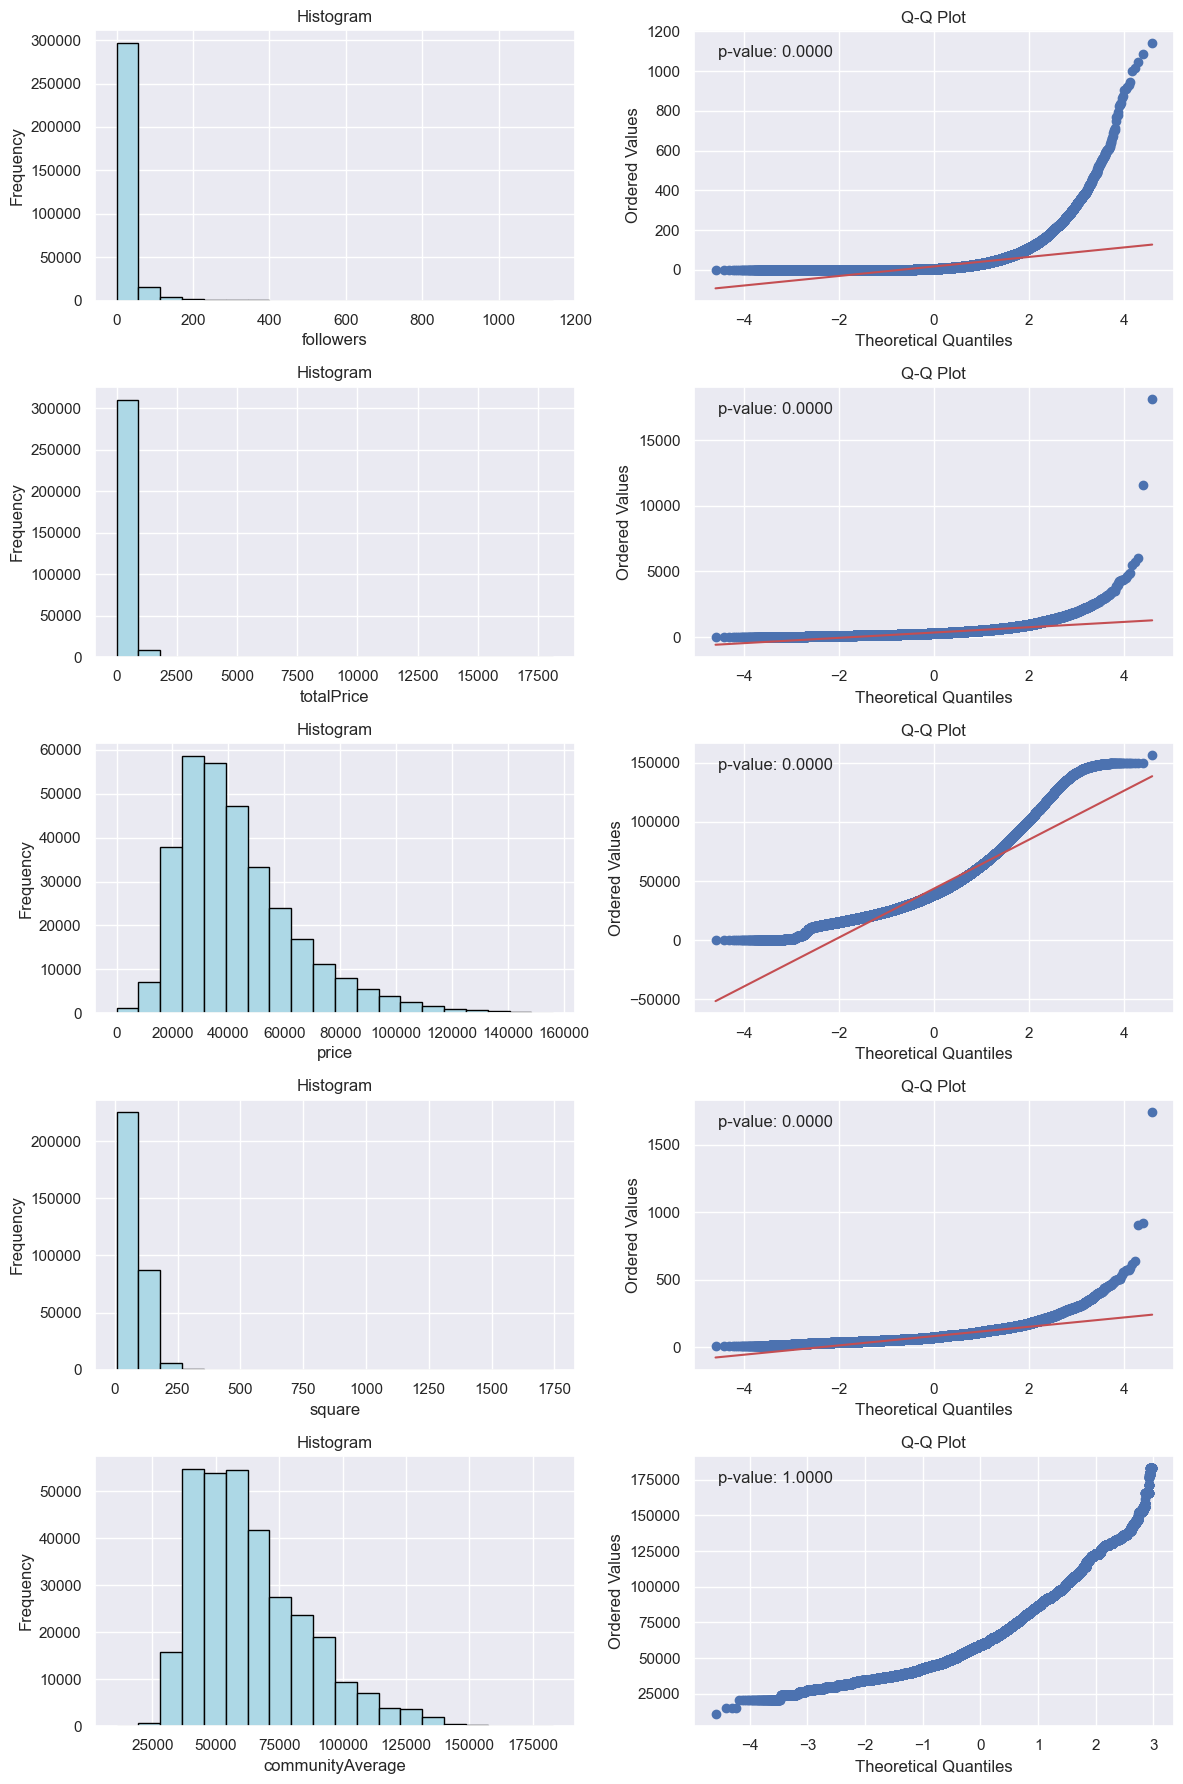

In [12]:
import scipy.stats as stats

# Select the numerical features for the normality test
numerical_features = ['followers', 'totalPrice', 'price', 'square', 'communityAverage']

# Perform normality test and create plots
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, 18))
fig.subplots_adjust(hspace=0.4)

for i, feature in enumerate(numerical_features):
    # Perform Shapiro-Wilk test for normality
    stat, p_value = stats.shapiro(housing[feature])
    
     # Print normality test result
    if p_value > 0.05:
        normality = 'Normal'
    else:
        normality = 'Not Normal'
    print(f'{feature}: p-value = {p_value:.4f} ({normality})')
    
    # Plot histogram
    axes[i, 0].hist(housing[feature], bins=20, color='lightblue', edgecolor='black')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_title('Histogram')
    
    # Plot Q-Q plot
    stats.probplot(housing[feature], dist='norm', plot=axes[i, 1])
    axes[i, 1].set_xlabel('Theoretical Quantiles')
    axes[i, 1].set_ylabel('Ordered Values')
    axes[i, 1].set_title('Q-Q Plot')
    
    # Add normality test result as text
    axes[i, 1].text(0.05, 0.9, f'p-value: {p_value:.4f}', transform=axes[i, 1].transAxes)

plt.tight_layout()
plt.show()

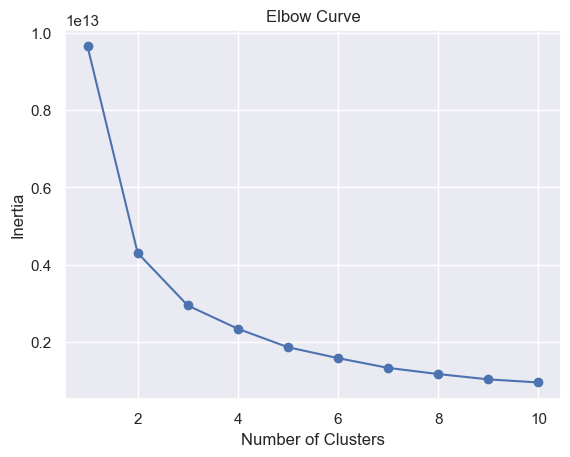

In [13]:
# Select the features for clustering
cols = ['Lng', 'Lat', "followers", "totalPrice", "price", "square", "communityAverage"]
X = housing[cols].sample(10000).dropna()

# Determine the optimal number of clusters using elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

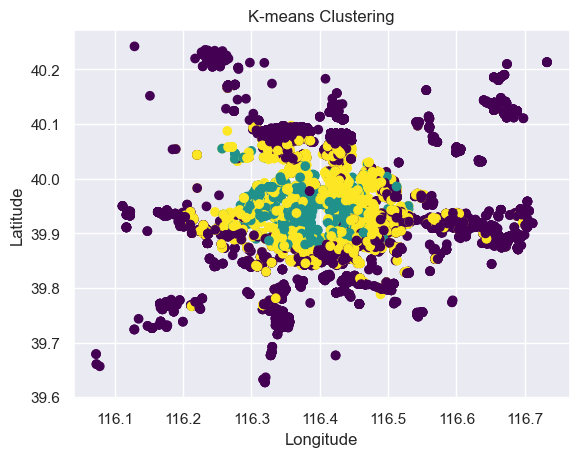

In [14]:
# Choose the optimal number of clusters
k = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Assign cluster labels to the data points
labels = kmeans.labels_

# Add the cluster labels to the original data
X['cluster'] = labels

# Visualize the clusters
plt.scatter(X['Lng'], X['Lat'], c=X['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')
plt.show()

In [15]:
X.groupby("cluster").median()[cols]

Lng        Lat  followers  totalPrice    price  square  \
cluster                                                                  
0        116.428411  39.923289        3.0       226.0  27901.0   84.15   
1        116.379130  39.943870       12.0       510.0  80126.0   61.80   
2        116.422317  39.937894        6.0       340.0  47724.5   68.74   

         communityAverage  
cluster                    
0                 46120.0  
1                 99634.0  
2                 70100.0

# Data Cleaning & Exploration

In [16]:
df = data.copy()

In [17]:
# Removing Ambigous values
df = df[df['livingRoom'] != '#NAME?']
df = df[df['constructionTime'] != 'δ֪']

def to_int(x):
    try:
        x = int(x)
    except:
        x = int(str(x).split(" ")[1])
    return x

df.floor = df.floor.apply(to_int)

In [18]:
# Setting df types
df['livingRoom'] = df['livingRoom'].astype(int)
df['bathRoom'] = df['bathRoom'].astype(float)
df['floor'] = df['floor'].astype(int)
df['constructionTime'] = pd.to_datetime(df['constructionTime'])

In [19]:
# Dropping unnecessary columns
df.drop(['url', 'id', 'Cid'], axis=1, inplace=True)

In [20]:
# lets try to check the percentage of missing values,unique values,percentage of one catagory values and type against each column.
def statistics(df):
    stats = []
    # Iterating all columns
    for col in df.columns:
        # Calculating different details and storing it into list
        stats.append((col, df[col].nunique(), df[col].isnull().sum(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))

    # Converting list into table
    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Missing values', 'Percentage of Missing Values', 'Data Type'])
    # Setting column name as index
    stats_df.set_index('Feature', drop=True, inplace=True)
    # Droping features in which no NAN  is present
    stats_df.drop(stats_df[stats_df['Missing values'] == 0].index, axis=0, inplace=True)
    # Sorting table according to number of NAN
    stats_df.sort_values('Percentage of Missing Values', ascending=False, inplace=True)
    return stats_df

statistics(df)

Unique_values  Missing values  Percentage of Missing Values  \
Feature                                                                         
DOM                         548          146142                     48.789461   
buildingType                  4            1546                      0.516132   
communityAverage           3969             295                      0.098486   

                 Data Type  
Feature                     
DOM                float64  
buildingType       float64  
communityAverage   float64

In [21]:
# Dropping DOP because null values are high
df.drop("DOM", axis=1, inplace=True)

# Handling null values
df.dropna(inplace=True)  # Drop rows with any null value

In [22]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [23]:
# Handling outliers
# Replace outliers in 'totalPrice' column with the median value
median_total_price = df['totalPrice'].median()
df['totalPrice'] = df['totalPrice'].apply(lambda x: median_total_price if x > 1000 else x)

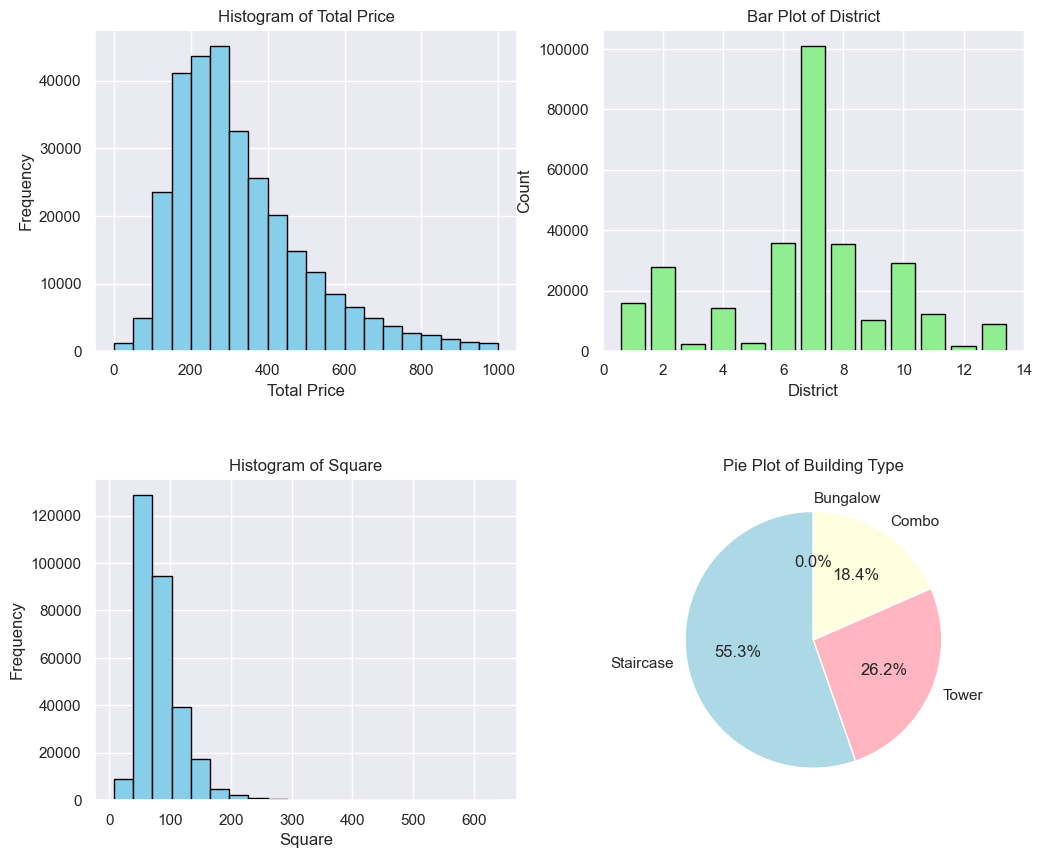

In [24]:
# Mapping of building type labels
building_type_labels = {
    1: 'Tower',
    2: 'Bungalow',
    3: 'Combo',
    4: 'Staircase'
}

# Set up the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

# Plot 1: Histogram and Box Plot for 'totalPrice'
axes[0, 0].hist(df['totalPrice'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Total Price')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of Total Price')


axes[1, 0].hist(df['square'], bins=20, color='skyblue', edgecolor='black')
axes[1, 0].set_xlabel('Square')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Square')


# Plot 2: Bar Plot for 'district'
district_counts = df['district'].value_counts()
axes[0, 1].bar(district_counts.index, district_counts.values, color='lightgreen', edgecolor='black')
axes[0, 1].set_xlabel('District')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Bar Plot of District')

# Plot 3: Pie Plot for 'buildingType'
building_type_counts = df['buildingType'].value_counts()
building_type_labels = [building_type_labels[label] for label in building_type_counts.index]
axes[1, 1].pie(building_type_counts.values, labels=building_type_labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink', 'lightyellow', 'lightgreen'])
axes[1, 1].set_title('Pie Plot of Building Type')


# Display the plots
plt.show()

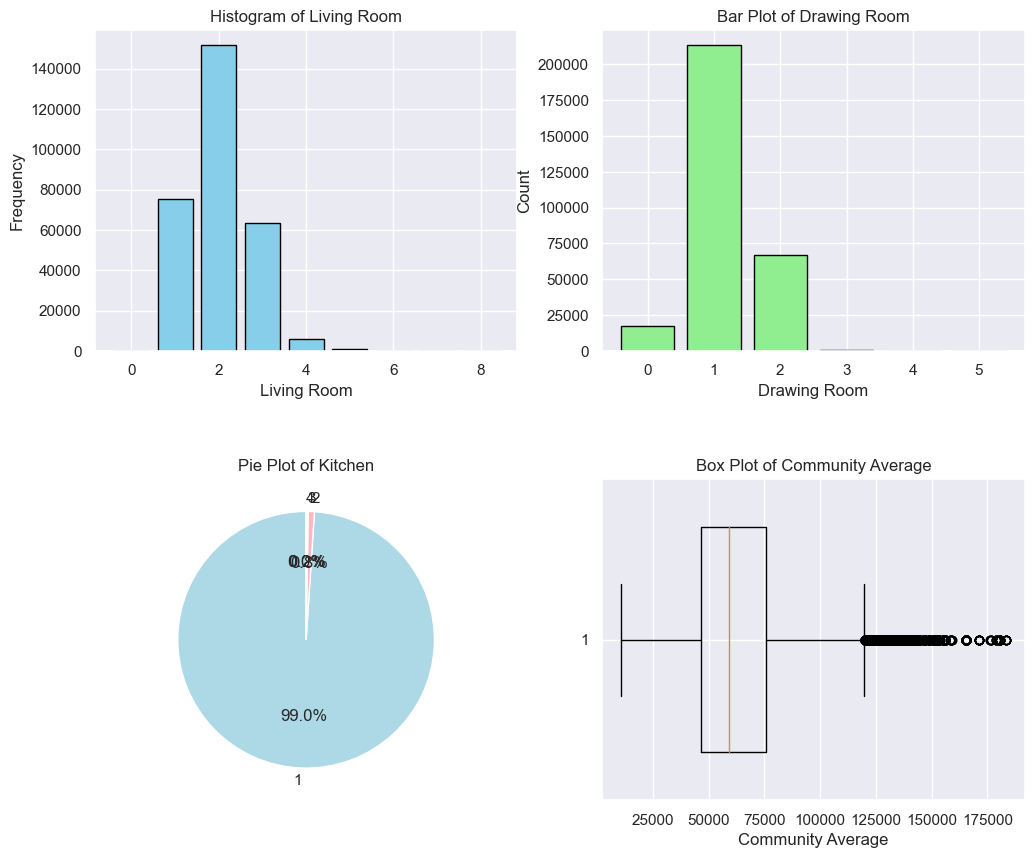

In [25]:
# Set up the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

# Plot 1: Histogram and Box Plot for 'livingRoom'
axes[0, 0].bar(df['livingRoom'].value_counts().index, df['livingRoom'].value_counts().values, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Living Room')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of Living Room')


# Plot 2: Bar Plot for 'drawingRoom'
drawing_counts = df['drawingRoom'].value_counts()
axes[0, 1].bar(drawing_counts.index, drawing_counts.values, color='lightgreen', edgecolor='black')
axes[0, 1].set_xlabel('Drawing Room')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Bar Plot of Drawing Room')

# Plot 3: Pie Plot for 'kitchen'
kitchen_counts = df['kitchen'].value_counts()
kitchen_labels = ['1', '2', '3', '4']
axes[1, 0].pie(kitchen_counts.values, labels=kitchen_labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink', 'lightyellow', 'lightgreen'])
axes[1, 0].set_title('Pie Plot of Kitchen')

# Plot 4: Histogram and Box Plot for 'communityAverage'
axes[1, 1].boxplot(df['communityAverage'], vert=False, widths=0.7)
axes[1, 1].set_xlabel('Community Average')
axes[1, 1].set_title('Box Plot of Community Average')

# Display the plots
plt.show()

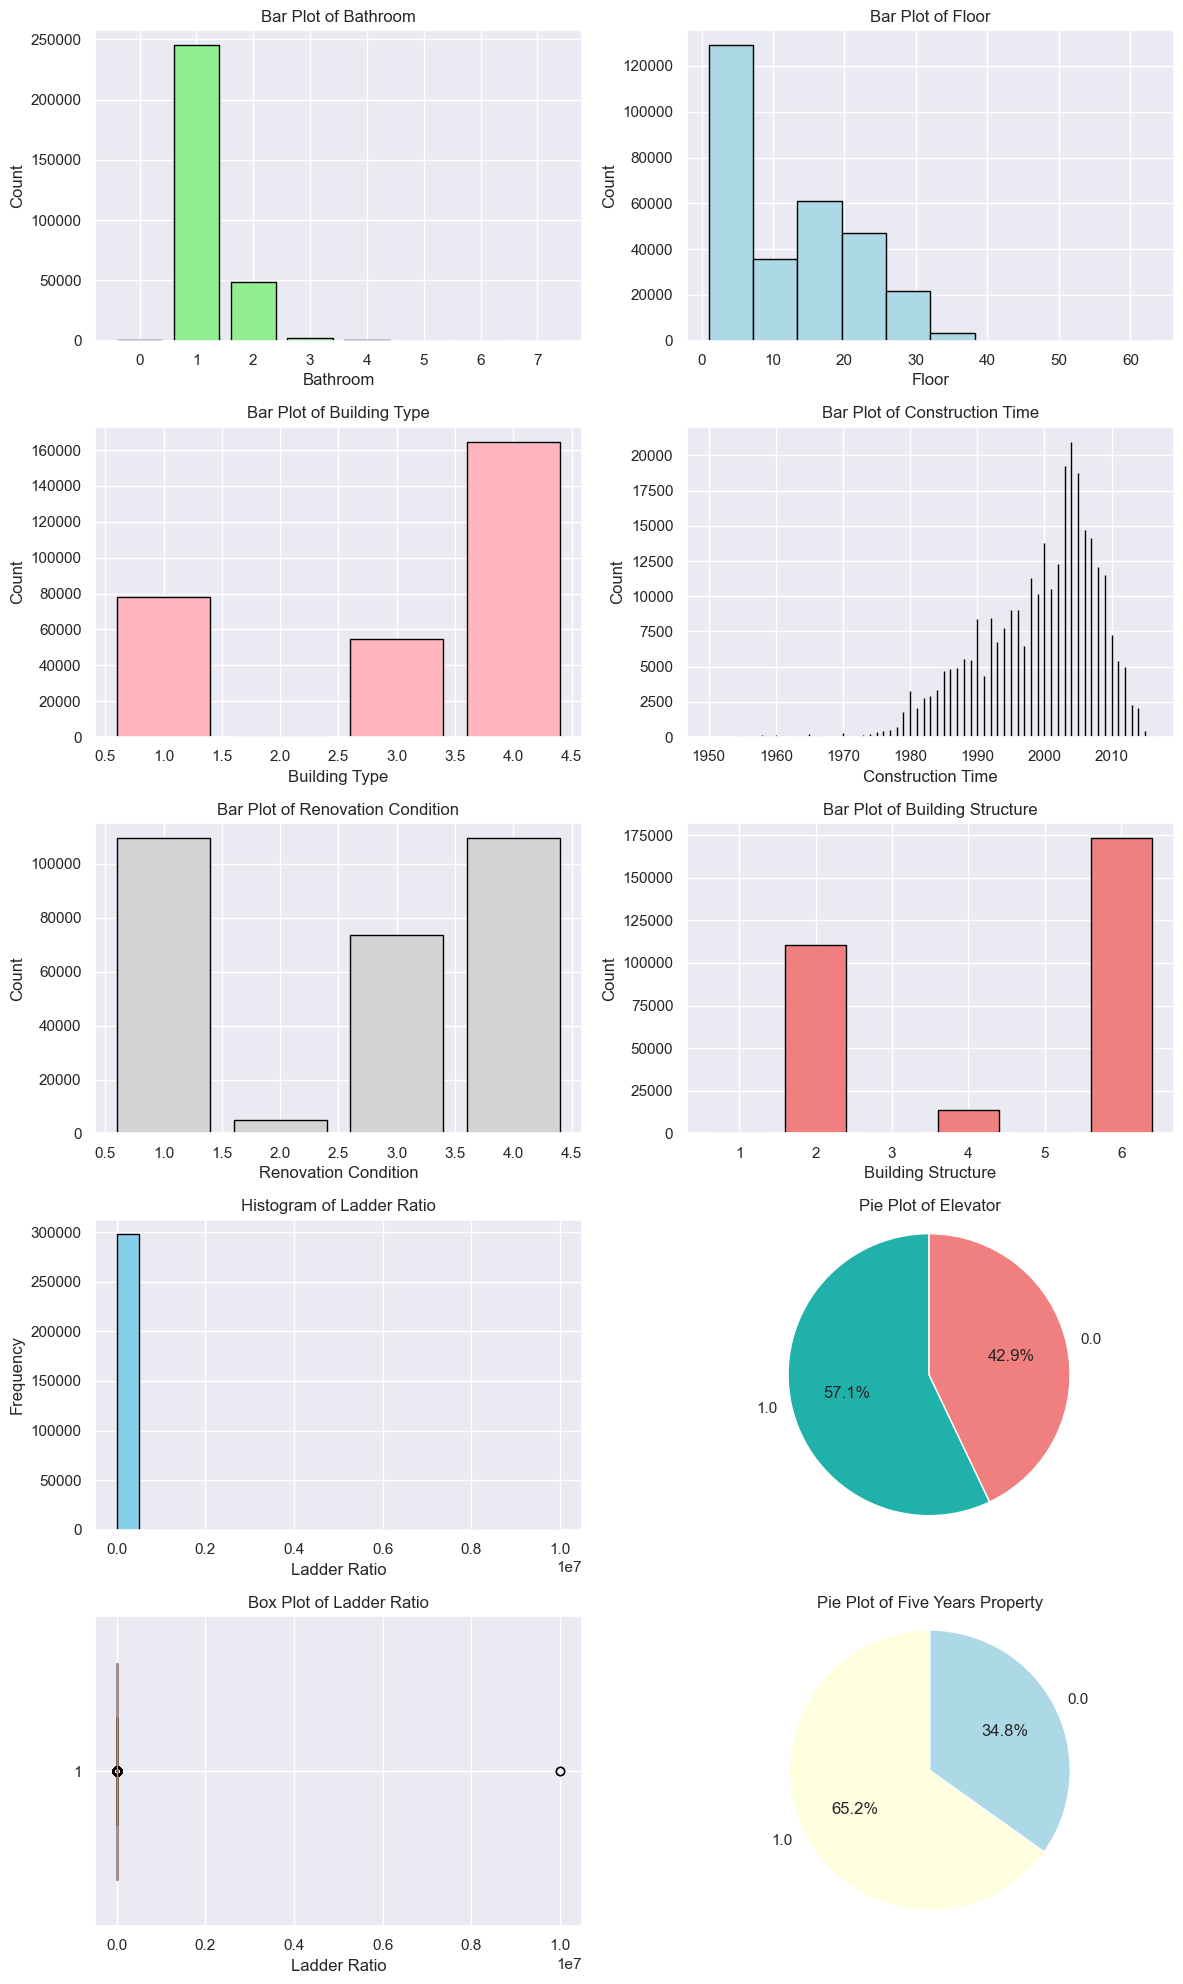

In [26]:
# Set up the subplots
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
plt.subplots_adjust(hspace=0.4)

# Plot 1: Bar Plot for 'bathRoom'
bathroom_counts = df['bathRoom'].value_counts()
axes[0, 0].bar(bathroom_counts.index, bathroom_counts.values, color='lightgreen', edgecolor='black')
axes[0, 0].set_xlabel('Bathroom')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Bar Plot of Bathroom')

# Plot 2: Bar Plot for 'floor'
axes[0, 1].hist(df["floor"], color='lightblue', edgecolor='black')
axes[0, 1].set_xlabel('Floor')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Bar Plot of Floor')

# Plot 3: Bar Plot for 'buildingType'
building_type_counts = df['buildingType'].value_counts()
axes[1, 0].bar(building_type_counts.index, building_type_counts.values, color='lightpink', edgecolor='black')
axes[1, 0].set_xlabel('Building Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Bar Plot of Building Type')

# Plot 4: Bar Plot for 'constructionTime'
construction_time_counts = df['constructionTime'].value_counts()
axes[1, 1].bar(construction_time_counts.index, construction_time_counts.values, color='lightyellow', edgecolor='black')
axes[1, 1].set_xlabel('Construction Time')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Bar Plot of Construction Time')

# Plot 5: Bar Plot for 'renovationCondition'
renovation_condition_counts = df['renovationCondition'].value_counts()
axes[2, 0].bar(renovation_condition_counts.index, renovation_condition_counts.values, color='lightgrey', edgecolor='black')
axes[2, 0].set_xlabel('Renovation Condition')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Bar Plot of Renovation Condition')

# Plot 6: Bar Plot for 'buildingStructure'
building_structure_counts = df['buildingStructure'].value_counts()
axes[2, 1].bar(building_structure_counts.index, building_structure_counts.values, color='lightcoral', edgecolor='black')
axes[2, 1].set_xlabel('Building Structure')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Bar Plot of Building Structure')

# Plot 7: Histogram and Box Plot for 'ladderRatio'
axes[3, 0].hist(df['ladderRatio'], bins=20, color='skyblue', edgecolor='black')
axes[3, 0].set_xlabel('Ladder Ratio')
axes[3, 0].set_ylabel('Frequency')
axes[3, 0].set_title('Histogram of Ladder Ratio')

axes[4, 0].boxplot(df['ladderRatio'], vert=False, widths=0.7)
axes[4, 0].set_xlabel('Ladder Ratio')
axes[4, 0].set_title('Box Plot of Ladder Ratio')

# Plot 8: Pie Plot for 'elevator'
elevator_counts = df.elevator.value_counts()
axes[3, 1].pie(elevator_counts.values, labels=elevator_counts.index, colors=['lightseagreen', 'lightcoral'], autopct='%1.1f%%', startangle=90)
axes[3, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
axes[3, 1].set_title('Pie Plot of Elevator')

# Plot 9: Pie Plot for 'fiveYearsProperty'
five_years_property_counts = df['fiveYearsProperty'].value_counts()
axes[4, 1].pie(five_years_property_counts.values, labels=five_years_property_counts.index, colors=['lightyellow', 'lightblue'], autopct='%1.1f%%', startangle=90)
axes[4, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
axes[4, 1].set_title('Pie Plot of Five Years Property')


# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [27]:
def analyze_relationship(x_feature, y_feature, type_of_x):
    print(f"Analyzing {x_feature.upper()} feature")
    
    # Check if x_feature is numerical or categorical
    if type_of_x == 'numerical':
        # Calculate Pearson correlation coefficient
        pearson_corr = df[x_feature].corr(df[y_feature])
        print(f"Pearson correlation between {x_feature} and {y_feature}: {pearson_corr:.2f}")
        
        # Create scatter plot
        plt.scatter(df[x_feature], df[y_feature])
        plt.xlabel(x_feature)
        plt.ylabel(y_feature)
        plt.title(f"Scatter Plot: {x_feature} vs {y_feature}")
        plt.show()
        
    elif type_of_x == 'categorical':
        # Aggregate y_feature by x_feature and calculate mean
        grouped_data = df.groupby(x_feature)[y_feature].mean().reset_index()
        
        # Calculate relationship between x_feature and y_feature
        relationship = grouped_data.corr().iloc[0, 1]
        print(f"Relationship between {x_feature} and {y_feature}: {relationship:.2f}")
        
        # Create bar plot
        sns.barplot(x=x_feature, y=y_feature, data=grouped_data)
        plt.xlabel(x_feature)
        plt.ylabel(f"Mean {y_feature}")
        plt.title(f"Bar Plot: Mean {y_feature} by {x_feature}")
        plt.show()
        
    else:
        print("Invalid type_of_x provided. Please specify 'numerical' or 'categorical'.")

Analyzing relationship between Lng and totalPrice:
Analyzing LNG feature
Pearson correlation between Lng and totalPrice: -0.08


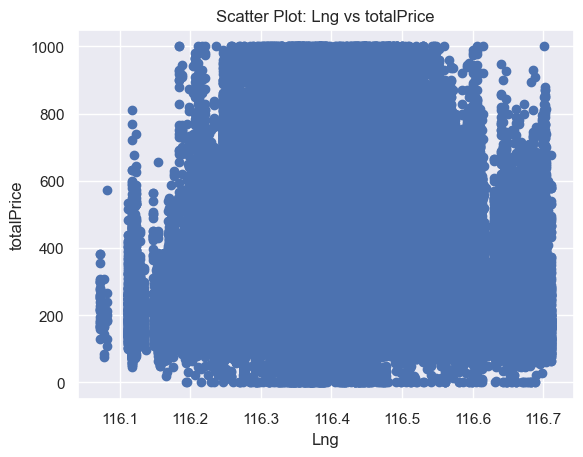


Analyzing relationship between Lat and totalPrice:
Analyzing LAT feature
Pearson correlation between Lat and totalPrice: 0.02


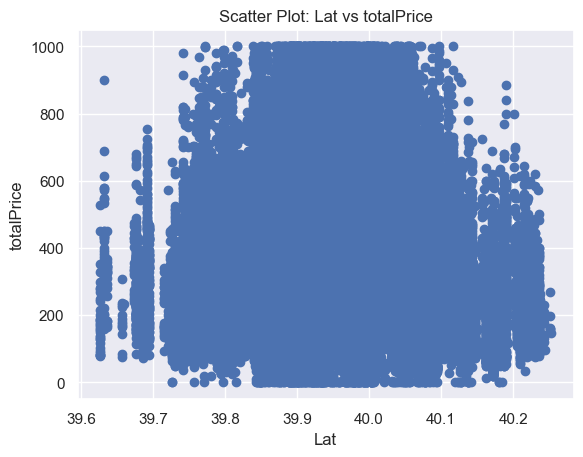


Analyzing relationship between followers and totalPrice:
Analyzing FOLLOWERS feature
Pearson correlation between followers and totalPrice: 0.19


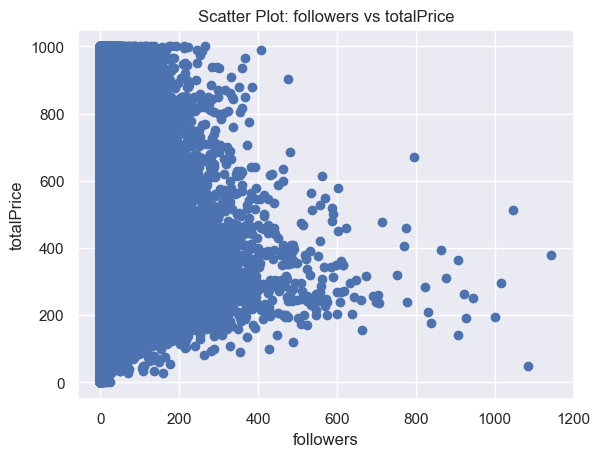


Analyzing relationship between price and totalPrice:
Analyzing PRICE feature
Pearson correlation between price and totalPrice: 0.63


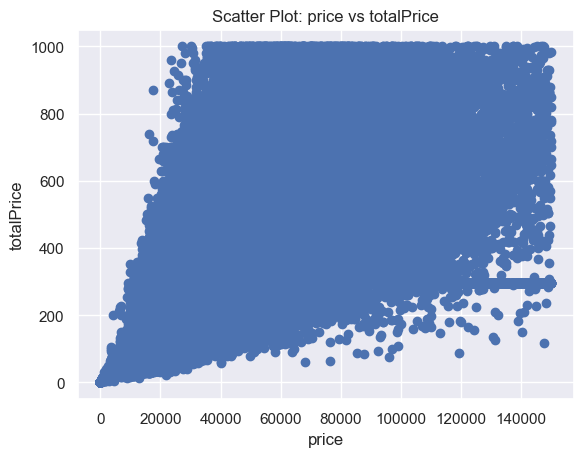


Analyzing relationship between square and totalPrice:
Analyzing SQUARE feature
Pearson correlation between square and totalPrice: 0.42


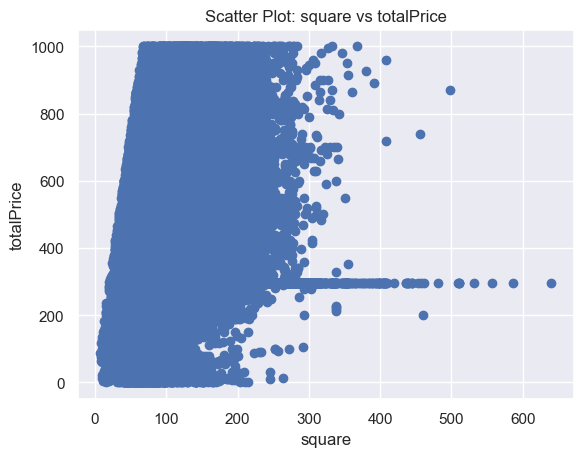


Analyzing relationship between ladderRatio and totalPrice:
Analyzing LADDERRATIO feature
Pearson correlation between ladderRatio and totalPrice: -0.00


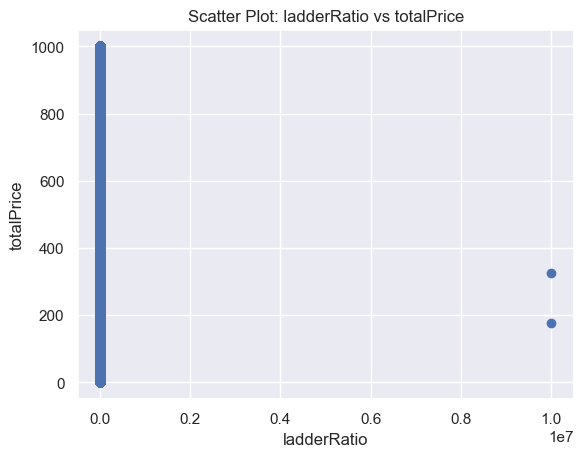


Analyzing relationship between communityAverage and totalPrice:
Analyzing COMMUNITYAVERAGE feature
Pearson correlation between communityAverage and totalPrice: 0.41


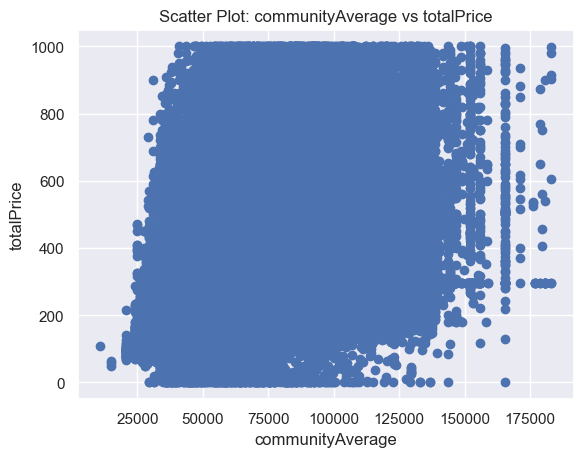


Analyzing relationship between livingRoom and totalPrice:
Analyzing LIVINGROOM feature
Relationship between livingRoom and totalPrice: 0.93


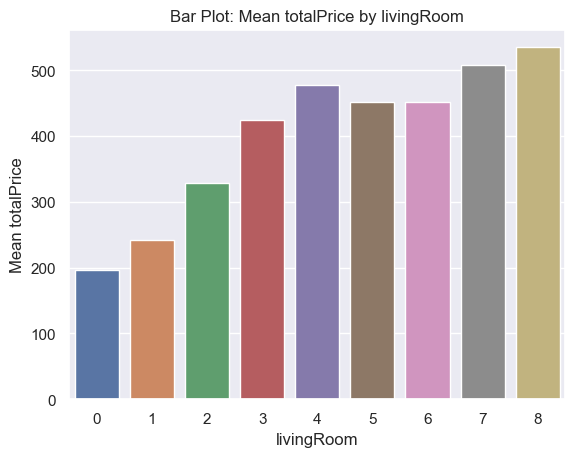


Analyzing relationship between drawingRoom and totalPrice:
Analyzing DRAWINGROOM feature
Relationship between drawingRoom and totalPrice: 0.94


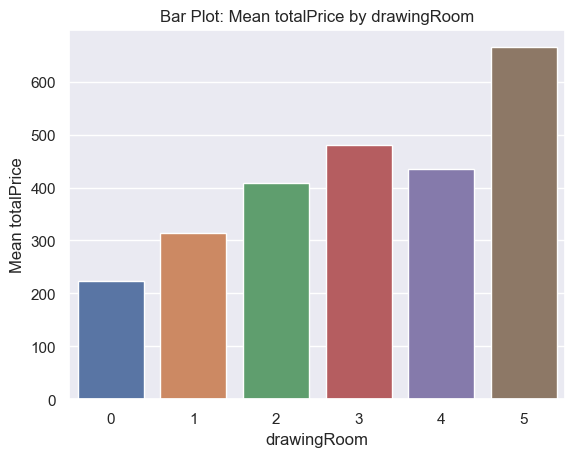


Analyzing relationship between kitchen and totalPrice:
Analyzing KITCHEN feature
Relationship between kitchen and totalPrice: 0.96


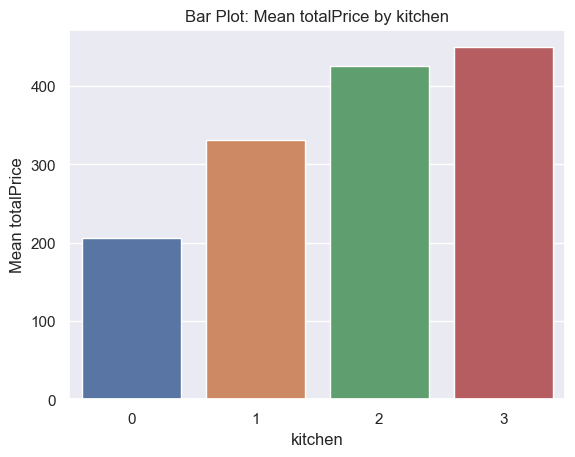


Analyzing relationship between bathRoom and totalPrice:
Analyzing BATHROOM feature
Relationship between bathRoom and totalPrice: 0.56


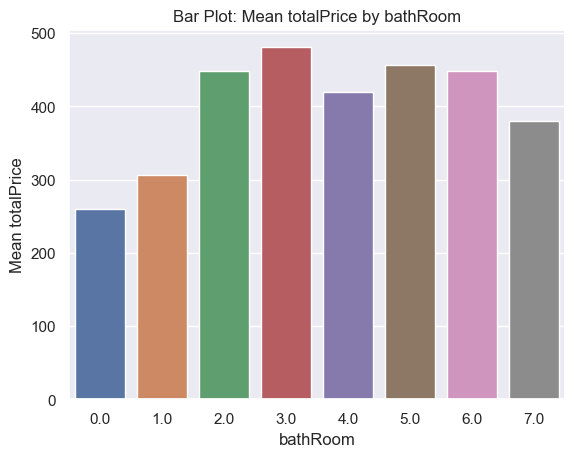


Analyzing relationship between floor and totalPrice:
Analyzing FLOOR feature
Relationship between floor and totalPrice: 0.34


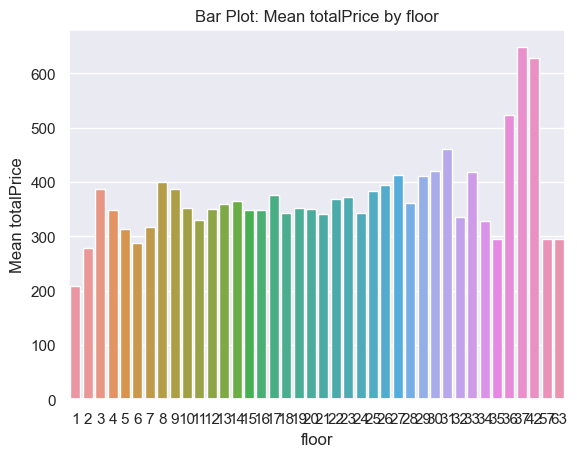


Analyzing relationship between buildingType and totalPrice:
Analyzing BUILDINGTYPE feature
Relationship between buildingType and totalPrice: 0.06


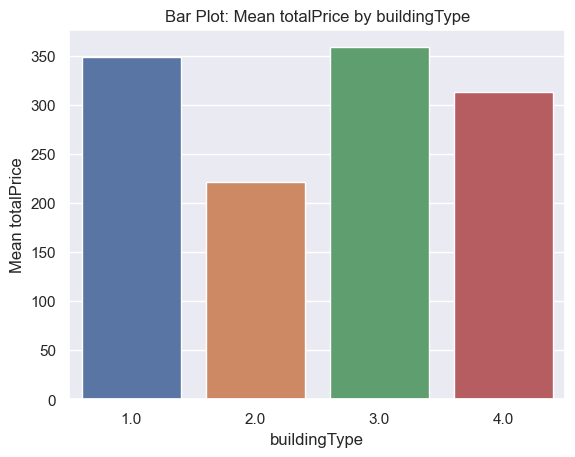


Analyzing relationship between renovationCondition and totalPrice:
Analyzing RENOVATIONCONDITION feature
Relationship between renovationCondition and totalPrice: 0.92


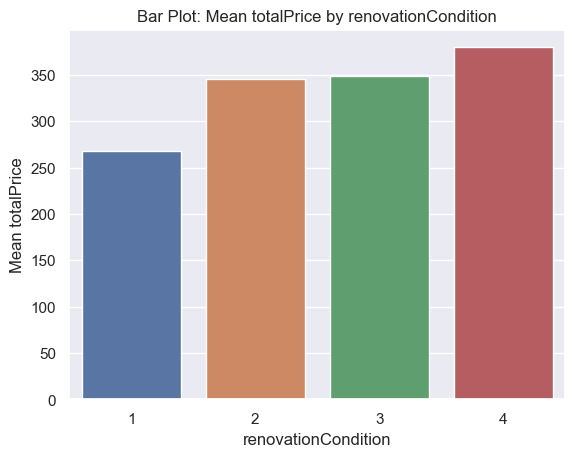


Analyzing relationship between buildingStructure and totalPrice:
Analyzing BUILDINGSTRUCTURE feature
Relationship between buildingStructure and totalPrice: 0.86


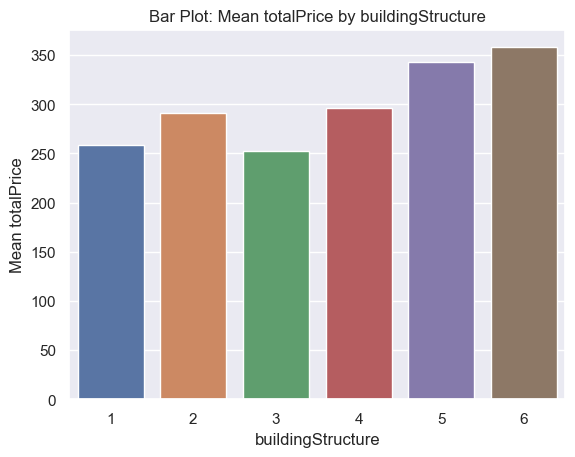


Analyzing relationship between elevator and totalPrice:
Analyzing ELEVATOR feature
Relationship between elevator and totalPrice: 1.00


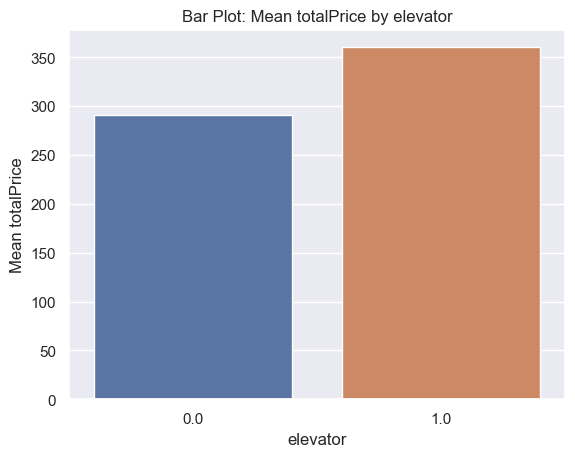


Analyzing relationship between fiveYearsProperty and totalPrice:
Analyzing FIVEYEARSPROPERTY feature
Relationship between fiveYearsProperty and totalPrice: 1.00


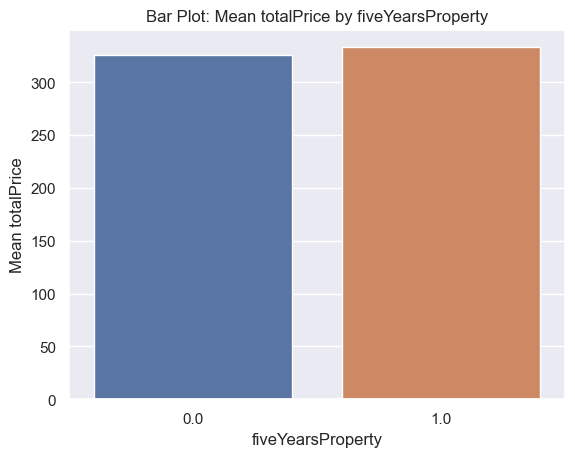


Analyzing relationship between subway and totalPrice:
Analyzing SUBWAY feature
Relationship between subway and totalPrice: 1.00


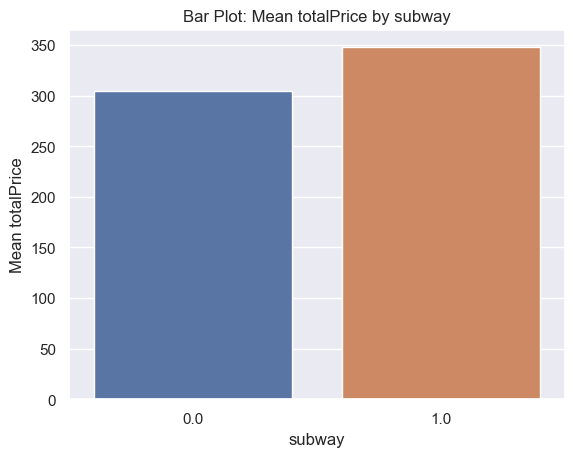


Analyzing relationship between district and totalPrice:
Analyzing DISTRICT feature
Relationship between district and totalPrice: -0.33


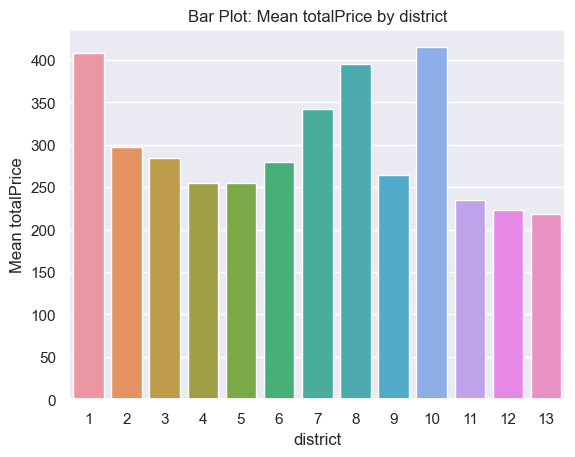

In [28]:
x_features = ['Lng', 'Lat', 'Cid', 'DOM', 'followers', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty', 'subway', 'district', 'communityAverage']
y_feature = 'totalPrice'

# Analyzing Numerical X Features
numerical_x_features = ['Lng', 'Lat', 'followers', 'price', 'square', 'ladderRatio', 'communityAverage']

for x_feature in numerical_x_features:
    print(f"Analyzing relationship between {x_feature} and {y_feature}:")
    analyze_relationship(x_feature, y_feature, 'numerical')
    print()

# Analyzing Categorical X Features
categorical_x_features = ['livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor', 'buildingType', 'renovationCondition', 'buildingStructure', 'elevator', 'fiveYearsProperty', 'subway', 'district']

for x_feature in categorical_x_features:
    print(f"Analyzing relationship between {x_feature} and {y_feature}:")
    analyze_relationship(x_feature, y_feature, 'categorical')
    print()

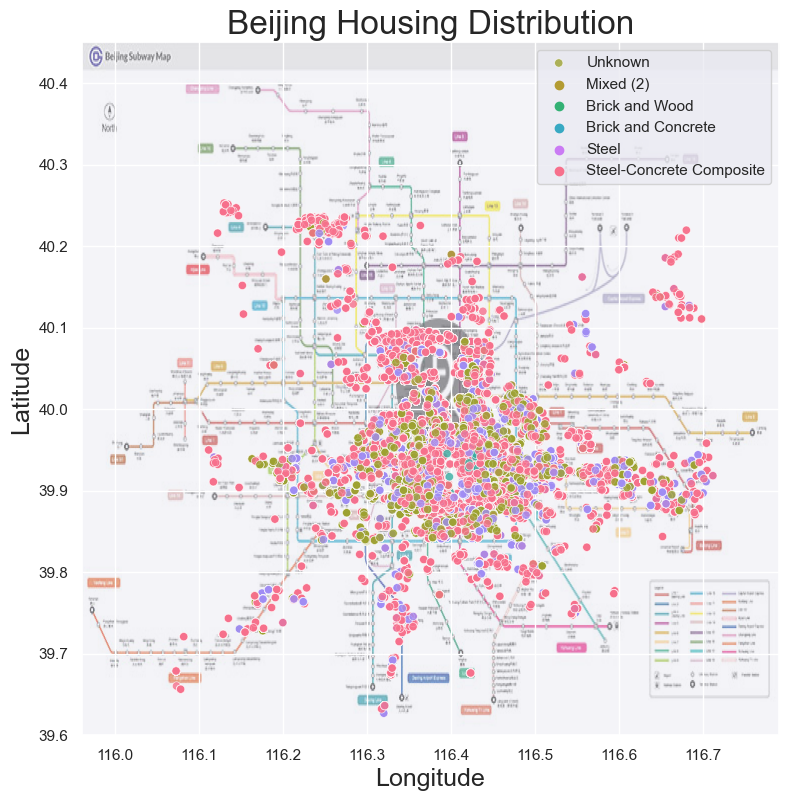

In [29]:
# Load the subway image
img = plt.imread("subway.jpg")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(9, 9))

# Display the subway image as the background
ax.imshow(img, alpha=0.5, extent=[115.96, 116.79, 39.6, 40.45], aspect='auto')

# Create a scatter plot of housing data
sns.scatterplot(data=housing, x="Lng", y="Lat", alpha=0.8, hue="buildingType", palette="husl")

# Add a legend to the plot
plt.legend(['Unknown', 'Mixed (2)', 'Brick and Wood', 'Brick and Concrete', 'Steel', 'Steel-Concrete Composite'], loc='best')

# Set labels for the x and y axes
plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)

# Set the title of the plot
plt.title('Beijing Housing Distribution', fontsize=24)

# Display the plot
plt.show()

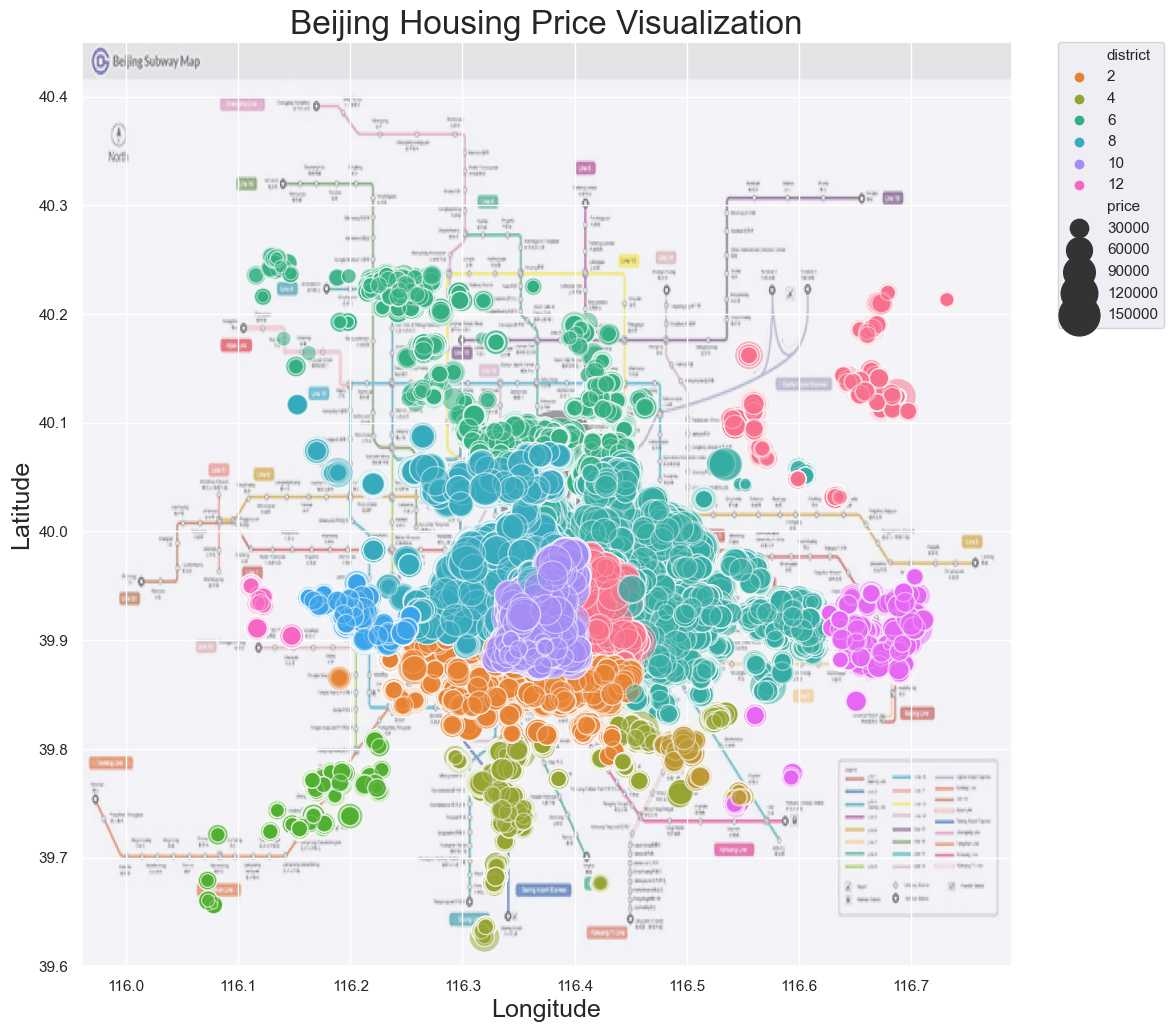

In [30]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Display the background image with subway lines
ax.imshow(img, alpha=0.5, extent=[115.96, 116.79, 39.6, 40.45], aspect='auto')

# Create a scatter plot of housing data
sns.scatterplot(data=housing, x="Lng", y="Lat", size='price', sizes=(1, 900),
                hue="district", alpha=0.5, legend='brief', palette="husl")

# Set labels for the x and y axes
plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)

# Add a legend to the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Set the title of the plot
plt.title('Beijing Housing Price Visualization', fontsize=24)

# Display the plot
plt.show()

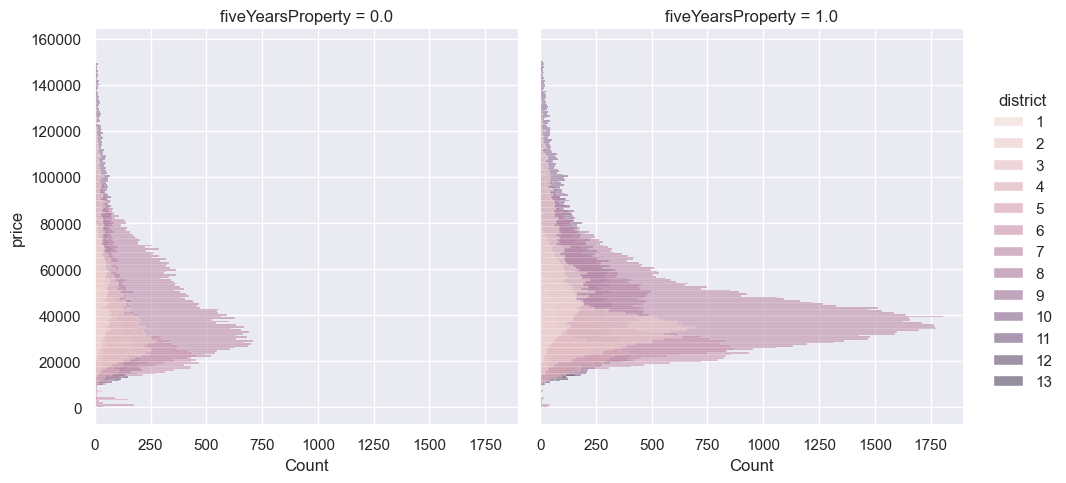

In [31]:
sns.displot(data=housing, y="price", hue="district", col="fiveYearsProperty")
plt.show()

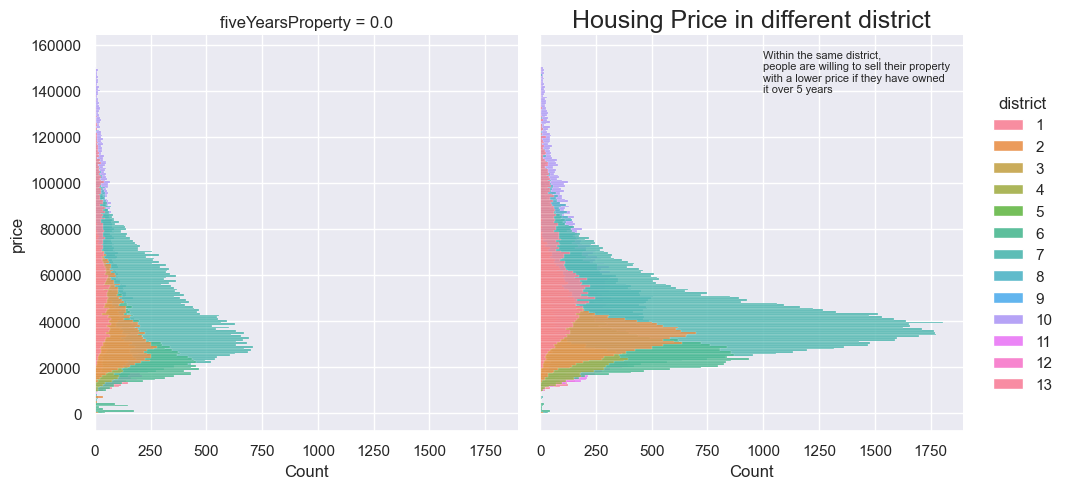

In [32]:
sns.displot(data=housing, y="price", col='fiveYearsProperty', hue="district", palette='husl', alpha=.8)
plt.text(x=1000, y=140000, s="Within the same district,\npeople are willing to sell their property\nwith a lower price if they have owned\nit over 5 years",wrap=True,fontsize=8)
plt.title("Housing Price in different district", fontsize=18)
plt.show()

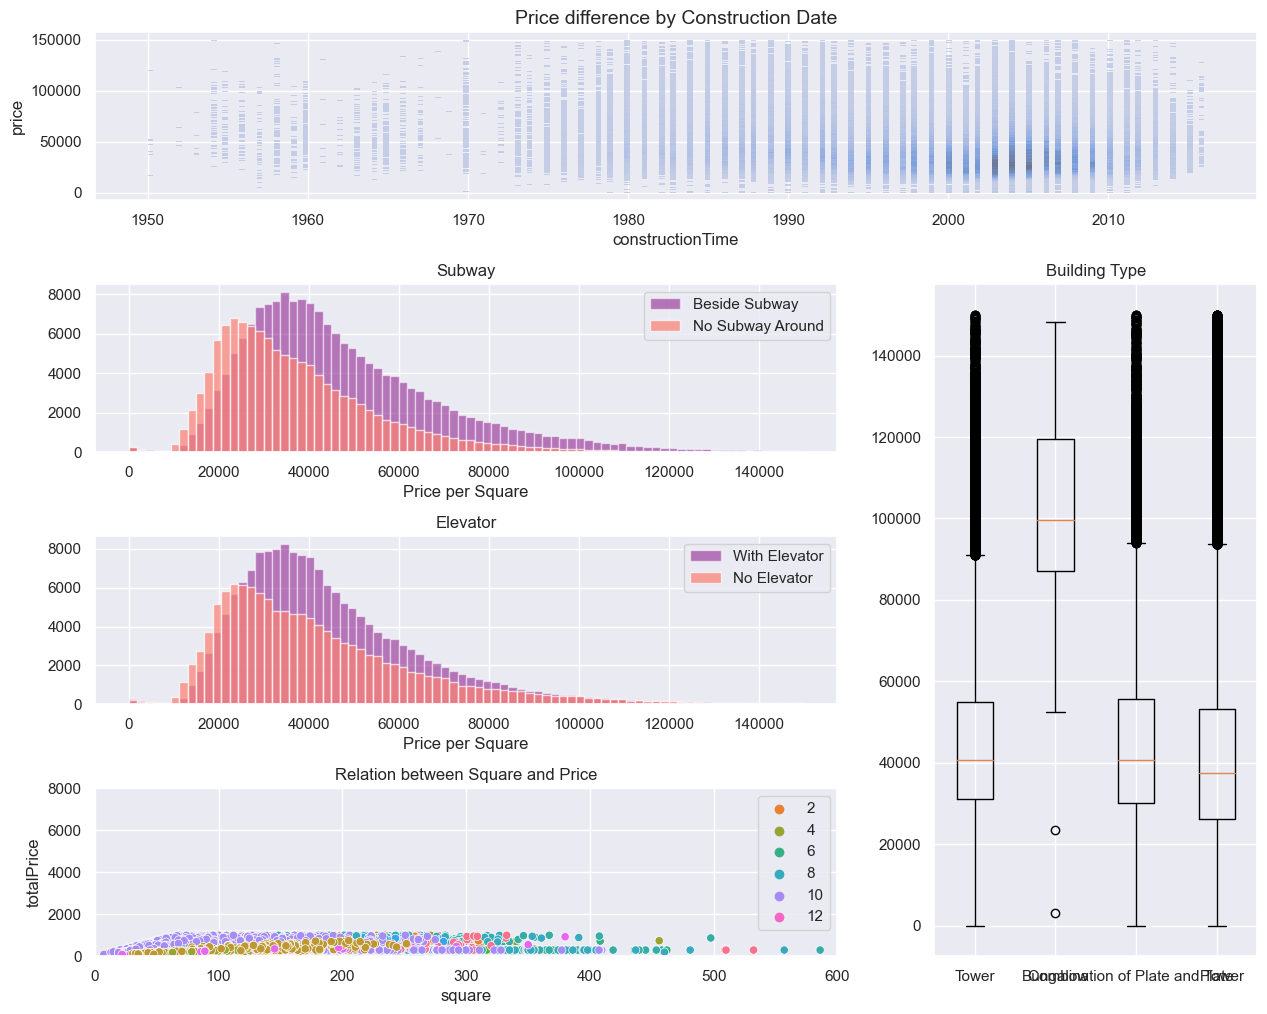

In [33]:
# Create the figure and GridSpec
fig = plt.figure(figsize=(15, 12))
gs = plt.GridSpec(4, 3)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.3)

# Filter the data based on elevator availability
with_elevator = df[df['elevator'] > 0]
without_elevator = df[df['elevator'] < 1]

# Plot 1: Price difference by Construction Date
ax1 = fig.add_subplot(gs[0, :])
ax1.set_title("Price difference by Construction Date", fontsize=14)
sns.histplot(data=df, x="constructionTime", y="price", alpha=0.8, ax=ax1)

# Filter the data based on subway availability
with_subway = df[df['subway'] > 0]
without_subway = df[df['subway'] < 1]

# Plot 2: Price distribution with and without subway
ax2 = fig.add_subplot(gs[1, :-1])
ax2.set_title('Subway')
ax2.hist(x=with_subway.price, bins=80, color="purple", alpha=0.5)
ax2.hist(x=without_subway.price, bins=80, color="salmon", alpha=0.7)
ax2.legend(["Beside Subway", "No Subway Around"])
ax2.set_xlabel('Price per Square')

# Plot 3: Price distribution with and without elevator
ax3 = fig.add_subplot(gs[2, :-1])
ax3.set_title('Elevator')
ax3.hist(x=with_elevator.price, bins=80, color="purple", alpha=0.5)
ax3.hist(x=without_elevator.price, bins=80, color="salmon", alpha=0.7)
ax3.set_xlabel('Price per Square')
ax3.legend(["With Elevator", "No Elevator"])

# Plot 4: Scatter plot of square vs. price with district coloring
ax4 = fig.add_subplot(gs[3, :-1])
ax4.set_title('Relation between Square and Price')
g = sns.scatterplot(data=df, y="totalPrice", x="square", hue="district", legend='auto', ax=ax4, palette='husl')
g.legend(loc="best")
g.set(xlim=(0, 600))
g.set(ylim=(0, 8000))

# Plot 5: Boxplot of price by building type
ax5 = fig.add_subplot(gs[1:, 2:])
ax5.set_title("Building Type")
group = df.groupby('buildingType')
b_type = [1., 2., 3., 4.]
typedata = []

for b_type in b_type:
    a = group.get_group(b_type)
    typedata.append(a.price)

ax5.boxplot(typedata, labels=['Tower', 'Bungalow', 'Combination of Plate and Tower', 'Plate'])
ax5.tick_params(top=False, bottom=False, left=False, right=False)

# Display the figure
plt.show()

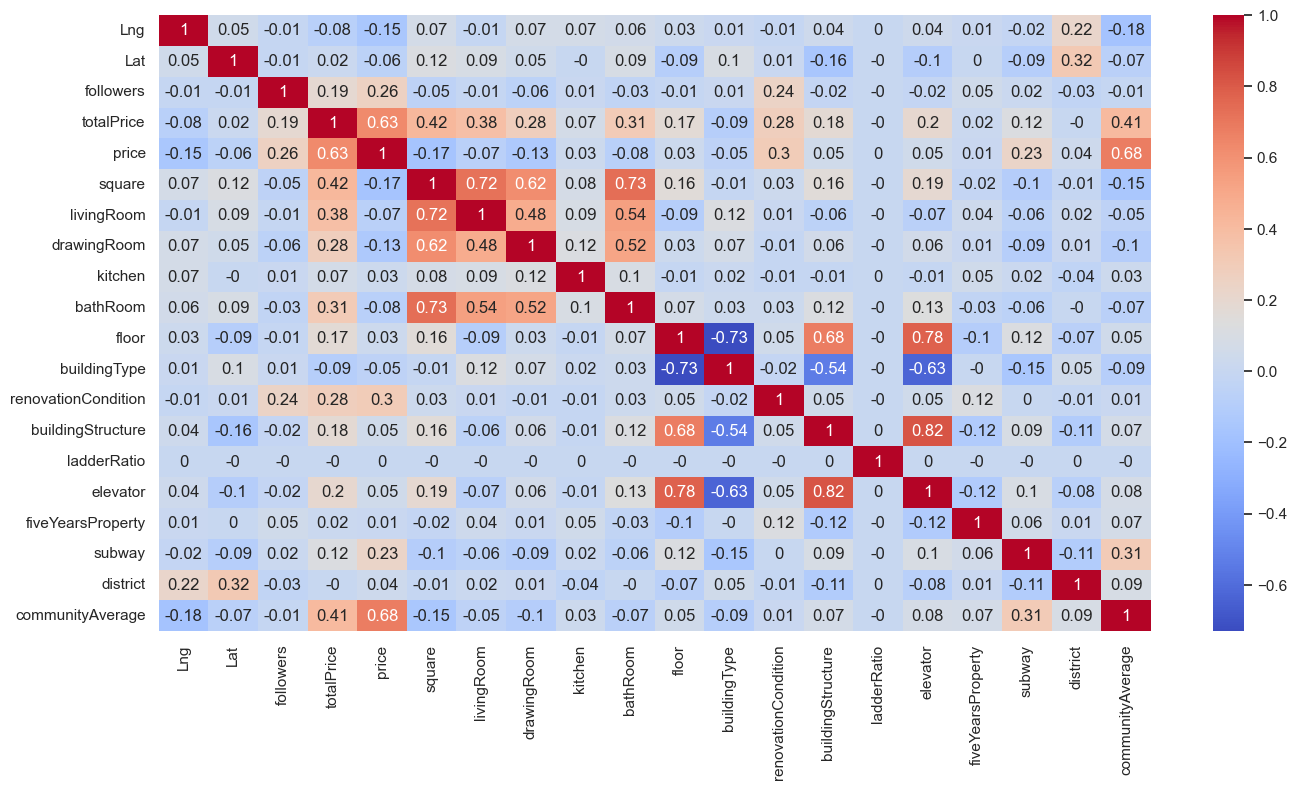

In [34]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr().round(2), annot=True, cmap="coolwarm")
plt.show()

# ML Modeling

In [35]:
# Dropping Constant Column
df.drop("ladderRatio", axis=1, inplace=True)

In [36]:
# Dropping time feature
df.drop(["tradeTime", "constructionTime"], axis=1, inplace=True)

In [37]:
X = df.drop("price", axis=1)
y = df.price

In [38]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

+ ==================================================================================================== +
			1-For Linear Regression, the performance results are:
+ ==================================================================================================== +
Training Score  :  0.7588175858949651
--------------------------------------------------
Testing Score   :  0.7542239896604749
--------------------------------------------------
Root mean squared error (RMSE) :  10704.284907038309
--------------------------------------------------
Mean absolute error (MAE) :  6928.105977818044
--------------------------------------------------
R2 score :  0.7542239896604749
--------------------------------------------------


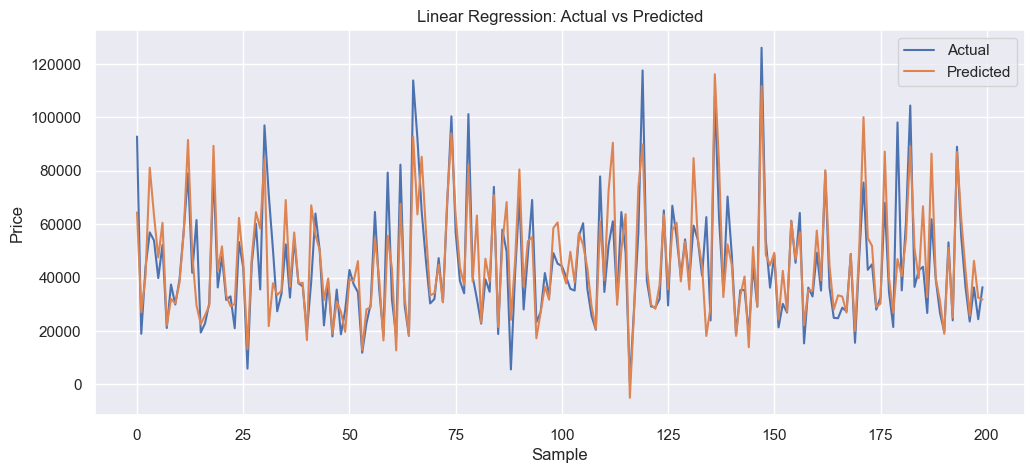

							-----------------------------------------------------------
							Time taken for Linear Regression detection: 0.489 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For Decision Tree, the performance results are:
+ ==================================================================================================== +
Training Score  :  0.9999953215103301
--------------------------------------------------
Testing Score   :  0.9835201788982441
--------------------------------------------------
Root mean squared error (RMSE) :  2771.8144929214805
--------------------------------------------------
Mean absolute error (MAE) :  564.8993365247334
--------------------------------------------------
R2 score :  0.9835201788982441
--------------------------------------------------


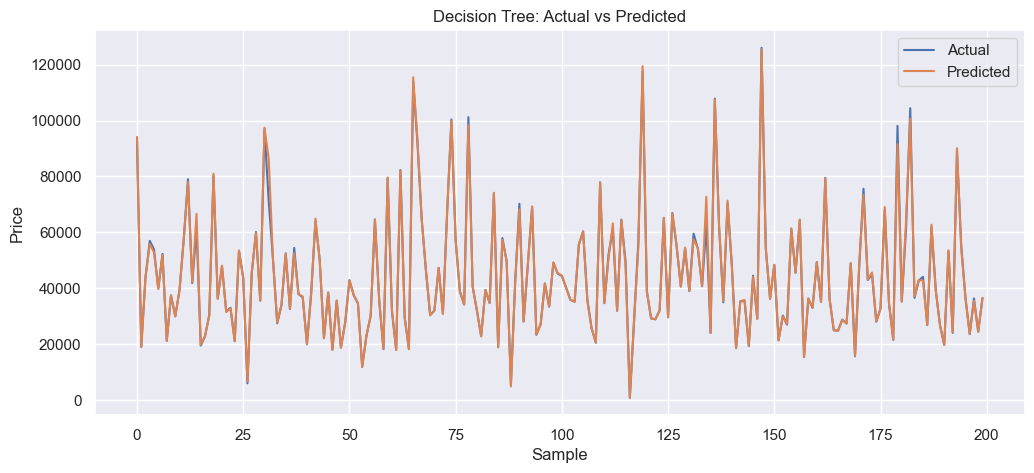

							-----------------------------------------------------------
							Time taken for Decision Tree detection: 3.163 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For Random Forest, the performance results are:
+ ==================================================================================================== +
Training Score  :  0.9988992450096641
--------------------------------------------------
Testing Score   :  0.9923924147960907
--------------------------------------------------
Root mean squared error (RMSE) :  1883.2645321605014
--------------------------------------------------
Mean absolute error (MAE) :  288.70276743292254
--------------------------------------------------
R2 score :  0.9923924147960907
--------------------------------------------------


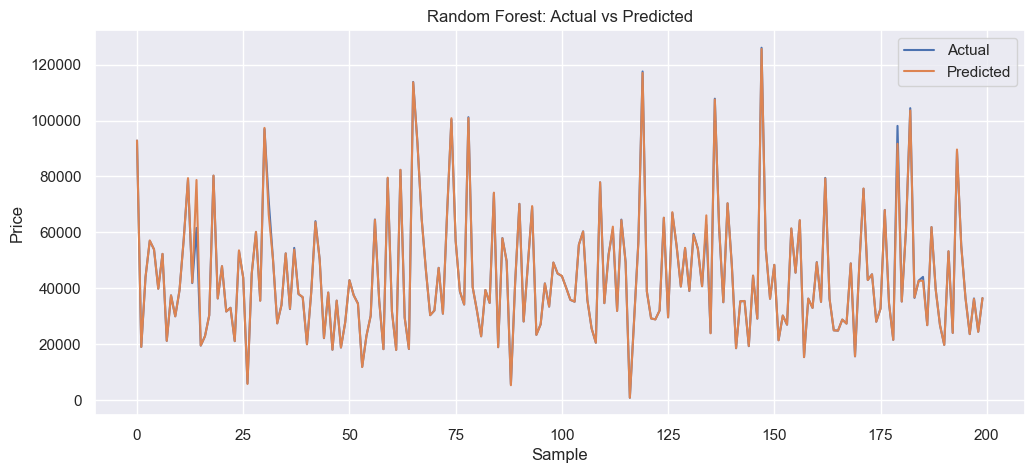

							-----------------------------------------------------------
							Time taken for Random Forest detection: 254.292 seconds...
							-----------------------------------------------------------



In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor())
]

# Initialize lists for storing performance metrics
train_scores = []
test_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

import time
for i, (name, model) in enumerate(models, start=1):
    start_time = time.time()
    
    # Fit model to the training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Calculate scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    # Predict values
    predictions = clf.predict(X_test)
    
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)

    # Print performance results
    print("+", "=" * 100, "+")
    print(f"\t\t\t{i}-For {name}, the performance results are:")
    print("+", "=" * 100, "+")
    print("Training Score  : ", train_score)
    print("-" * 50)
    print("Testing Score   : ", test_score)
    print("-" * 50)
    print("Root mean squared error (RMSE) : ", rmse)
    print("-" * 50)
    print("Mean absolute error (MAE) : ", mae)
    print("-" * 50)
    print("R2 score : ", r2)
    print("-" * 50)

    # Line plot for actual vs predicted values
    plt.figure(figsize=(12, 5))
    plt.plot(y_test.values[:200], label='Actual')
    plt.plot(predictions[:200], label='Predicted')
    plt.xlabel('Sample')
    plt.ylabel('Price')
    plt.title(f'{name}: Actual vs Predicted')
    plt.legend()
    plt.show()

    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\tTime taken for {name} detection: {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()

In [40]:
# Create a dataframe to store the performance metrics
comp = pd.DataFrame({
    "Models": [name for name, _ in models],
    "Training Score": train_scores,
    "Testing Score": test_scores,
    "MAE": mae_scores,
    "RMSE": rmse_scores,
    "R2 Score": r2_scores
})

comp

Models  Training Score  Testing Score          MAE  \
0  Linear Regression        0.758818       0.754224  6928.105978   
1      Decision Tree        0.999995       0.983520   564.899337   
2      Random Forest        0.998899       0.992392   288.702767   

           RMSE  R2 Score  
0  10704.284907  0.754224  
1   2771.814493  0.983520  
2   1883.264532  0.992392

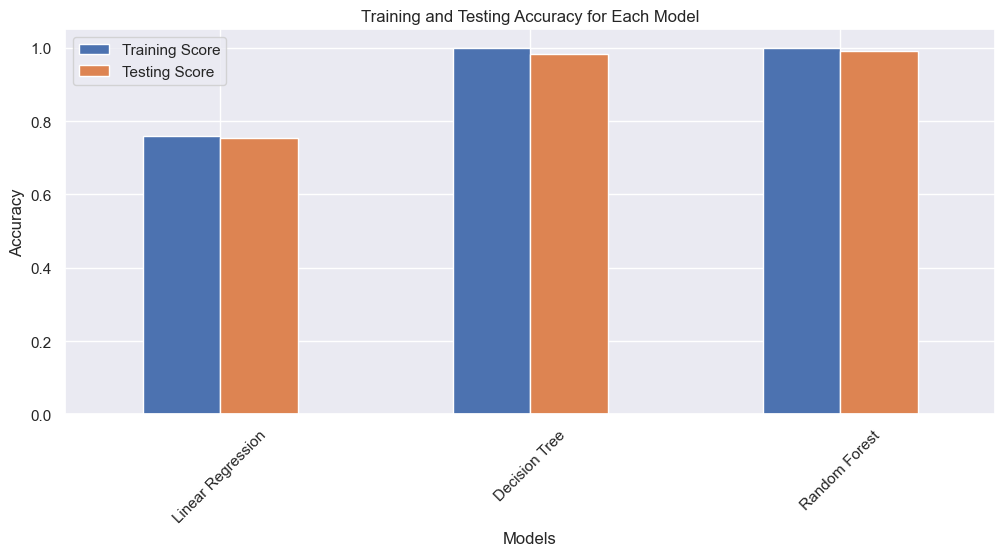

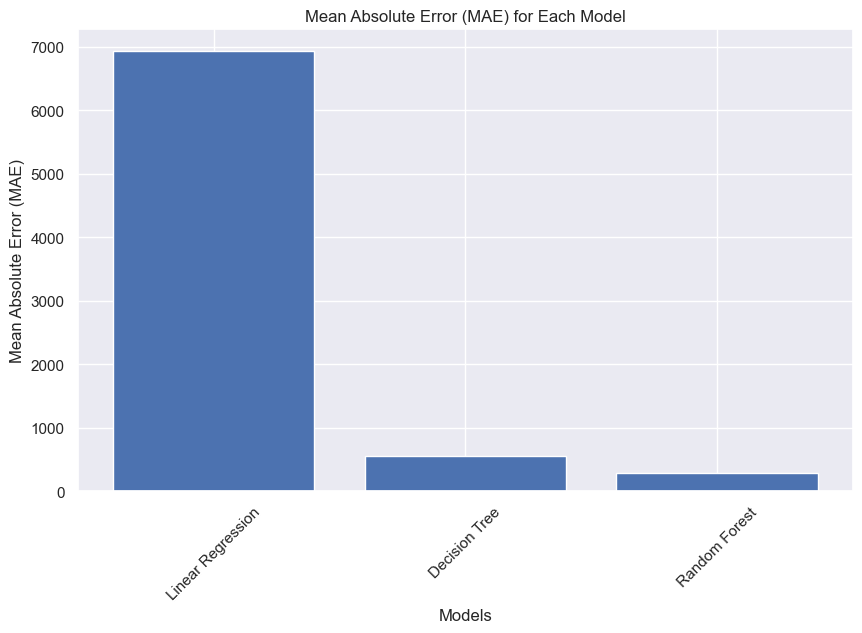

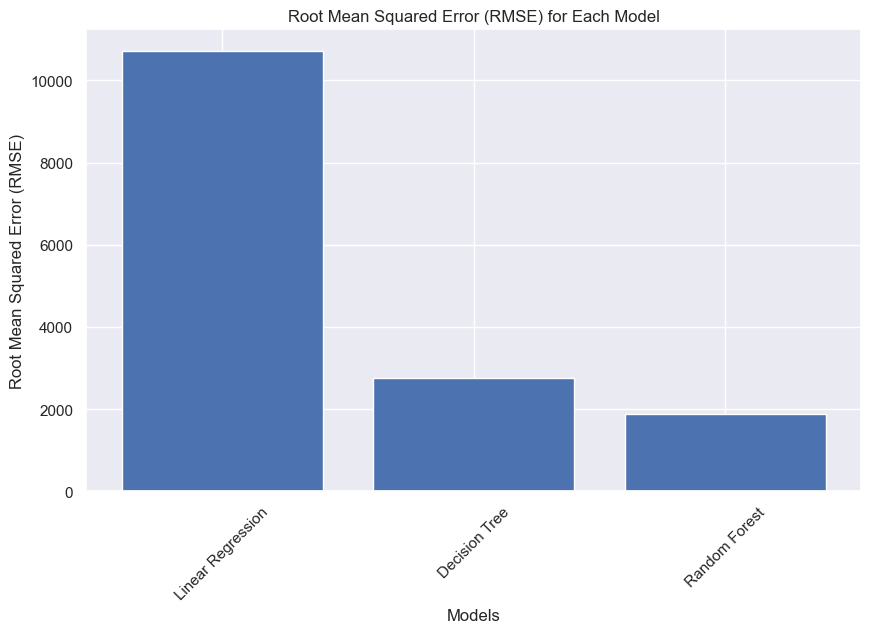

In [41]:
# Unstacked bar plot for training and testing accuracy
comp.set_index("Models")[["Training Score", "Testing Score"]].plot(kind="bar", figsize=(12, 5))
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Each Model')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Bar plot for MAE
plt.figure(figsize=(10, 6))
plt.bar(comp['Models'], comp['MAE'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) for Each Model')
plt.xticks(rotation=45)
plt.show()

# Bar plot for MSE
plt.figure(figsize=(10, 6))
plt.bar(comp['Models'], comp['RMSE'])
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Root Mean Squared Error (RMSE) for Each Model')
plt.xticks(rotation=45)
plt.show()